In [1]:
import pandas as pd

data = pd.read_csv('data/23-11-18_15-30_adresses_places_id.csv')

data_weather = pd.read_csv('data/weather-22-to-05-11-23.csv')

In [68]:
data.columns

Index(['end_time', 'user_id', 'start_latitude', 'start_longitude',
       'end_latitude', 'end_longitude', 'company', 'duration_min',
       'temperature_2m (°C)', 'rain (mm)', 'snowfall (cm)',
       'wind_speed_10m (km/h)', 'wind_gusts_10m (km/h)', 'is_day ()', 'year',
       'month', 'day', 'hour', 'start_street', 'end_street', 'start_location',
       'end_location', 'start_elevation', 'end_elevation', 'elevation_dif',
       'day_of_week', 'day_name_cz', 'month_name_cz', 'month_year',
       'start_address_id', 'end_address_id', 'start_place_id', 'end_place_id',
       'round_temperature', 'rental_number'],
      dtype='object')

/var/folders/bw/bypp18t56_j88v6zlzc3jbvh0000gn/T/ipykernel_78145/4184107703.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_data['Sorted_Interval_teplot'] = pd.Categorical(boxplot_data['temp_int'], categories=intervaly, ordered=True)
/var/folders/bw/bypp18t56_j88v6zlzc3jbvh0000gn/T/ipykernel_78145/4184107703.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sorted_Interval_teplot', y='duration_min', data=boxplot_data, showfliers=False, palette = "viridis")


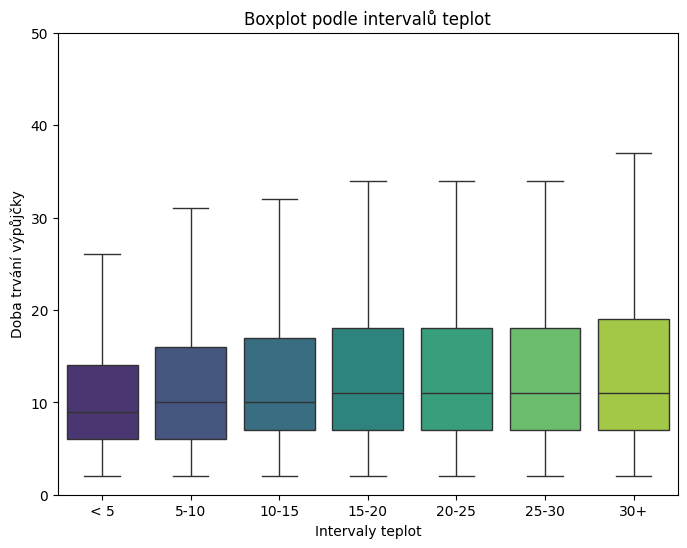

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

def rozdel_teplotu(teplota):
    if teplota <= 5:
        return '< 5'
    elif teplota > 5 and teplota <= 10:
        return '5-10'
    elif teplota > 10 and teplota <= 15:
        return '10-15'
    elif teplota > 15 and teplota <= 20:
        return '15-20'
    elif teplota > 20 and teplota <= 25:
        return '20-25'
    elif teplota > 25 and teplota <= 30:
        return '25-30'
    elif teplota > 30 :
        return '30+'

intervaly = ["< 5", "5-10", "10-15", "15-20", "20-25", "25-30", "30+"]

data['temp_int'] = data['temperature_2m (°C)'].apply(rozdel_teplotu)
data.reset_index()
boxplot_data = data[["duration_min", "temp_int"]]

boxplot_data['Sorted_Interval_teplot'] = pd.Categorical(boxplot_data['temp_int'], categories=intervaly, ordered=True)

plt.figure(figsize=(8, 6))

sns.boxplot(x='Sorted_Interval_teplot', y='duration_min', data=boxplot_data, showfliers=False, palette = "viridis")
plt.title('Boxplot podle intervalů teplot')
plt.xlabel('Intervaly teplot')
plt.ylim(0, 50)
plt.ylabel('Doba trvání výpůjčky')
plt.show()


In [2]:

data_weather["time"] = pd.to_datetime(data_weather["time"], format="%Y-%m-%dT%H:%M")


In [3]:
data["start_time"] = pd.to_datetime(data["start_time"], format="%Y-%m-%d %H:%M:%S")

data["start_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 234466 entries, 0 to 234465
Series name: start_time
Non-Null Count   Dtype         
--------------   -----         
234466 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 MB


In [4]:

data.set_index('start_time', inplace=True)

data['rental_number'] = 1

rentals_in_hours = data['rental_number'].resample('H').sum()

print(rentals_in_hours)

start_time
2022-04-01 00:00:00     1
2022-04-01 01:00:00     0
2022-04-01 02:00:00     0
2022-04-01 03:00:00     0
2022-04-01 04:00:00     0
                       ..
2023-10-31 19:00:00    18
2023-10-31 20:00:00    16
2023-10-31 21:00:00    24
2023-10-31 22:00:00    19
2023-10-31 23:00:00    11
Freq: H, Name: rental_number, Length: 13896, dtype: int64


In [36]:
merged_data = pd.merge(rentals_in_hours, data_weather, how = "left", left_on = "start_time", right_on = "time" )
merged_data = merged_data[merged_data['time'] > '2022-04-11']
merged_data

,rental_number,time,temperature_2m (°C),rain (mm),snowfall (cm),wind_speed_10m (km/h),wind_gusts_10m (km/h),is_day ()
241,0,2022-04-11 01:00:00,0.5,0.0,0.0,8.4,15.1,0
242,2,2022-04-11 02:00:00,0.0,0.0,0.0,7.9,15.5,0
243,0,2022-04-11 03:00:00,-0.4,0.0,0.0,7.7,14.4,0
244,0,2022-04-11 04:00:00,-0.6,0.0,0.0,8.7,15.5,0
245,0,2022-04-11 05:00:00,0.0,0.0,0.0,9.5,15.5,1
...,...,...,...,...,...,...,...,...
13891,18,2023-10-31 19:00:00,9.7,0.0,0.0,9.9,17.6,0
13892,16,2023-10-31 20:00:00,9.1,0.0,0.0,9.5,18.0,0
13893,24,2023-10-31 21:00:00,8.5,0.0,0.0,8.7,16.6,0
13894,19,2023-10-31 22:00:00,8.3,0.0,0.0,9.9,17.6,0


In [49]:
#data transfer check
merged_data[merged_data["temperature"]<0].to_csv("data/segmented_data.csv")
merged_data

,rental_number,time,temperature_2m (°C),rain (mm),snowfall (cm),wind_speed_10m (km/h),wind_gusts_10m (km/h),is_day (),rain_yes_no,temperature
241,0,2022-04-11 01:00:00,0.5,0.0,0.0,8.4,15.1,0,False,0
242,2,2022-04-11 02:00:00,0.0,0.0,0.0,7.9,15.5,0,False,0
243,0,2022-04-11 03:00:00,-0.4,0.0,0.0,7.7,14.4,0,False,0
244,0,2022-04-11 04:00:00,-0.6,0.0,0.0,8.7,15.5,0,False,-1
245,0,2022-04-11 05:00:00,0.0,0.0,0.0,9.5,15.5,1,False,0
...,...,...,...,...,...,...,...,...,...,...
13891,18,2023-10-31 19:00:00,9.7,0.0,0.0,9.9,17.6,0,False,10
13892,16,2023-10-31 20:00:00,9.1,0.0,0.0,9.5,18.0,0,False,9
13893,24,2023-10-31 21:00:00,8.5,0.0,0.0,8.7,16.6,0,False,8
13894,19,2023-10-31 22:00:00,8.3,0.0,0.0,9.9,17.6,0,False,8


In [38]:
merged_data["rain_yes_no"] = True
mask = merged_data["rain (mm)"] == 0
merged_data.loc[mask, "rain_yes_no"] = False

merged_data["time"]


241     2022-04-11 01:00:00
242     2022-04-11 02:00:00
243     2022-04-11 03:00:00
244     2022-04-11 04:00:00
245     2022-04-11 05:00:00
                ...        
13891   2023-10-31 19:00:00
13892   2023-10-31 20:00:00
13893   2023-10-31 21:00:00
13894   2023-10-31 22:00:00
13895   2023-10-31 23:00:00
Name: time, Length: 13655, dtype: datetime64[ns]

In [50]:

rainy = merged_data[merged_data["rain (mm)"] > 0]
dry = merged_data[merged_data["rain (mm)"] == 0]


prumer_destive = rainy['rental_number'].mean()
prumer_nedestive = dry['rental_number'].mean()


print(f'Průměrný počet výpůjček v deštivých hodinách: {prumer_destive}')
print(f'Průměrný počet výpůjček v nedeštivých hodinách: {prumer_nedestive}')
len(rainy)

Průměrný počet výpůjček v deštivých hodinách: 13.66685945633314
Průměrný počet výpůjček v nedeštivých hodinách: 17.67851752473587


1729

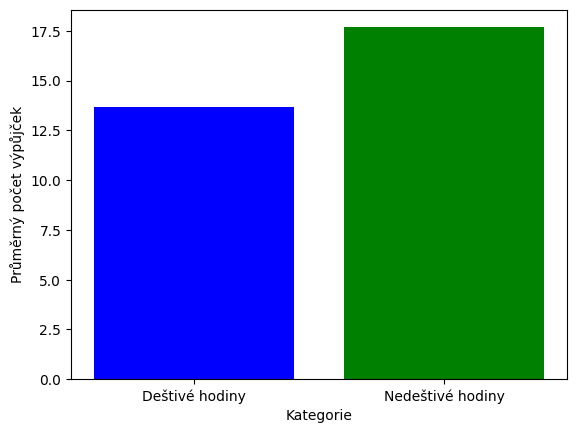

In [51]:
import matplotlib.pyplot as plt

kategorie = ['Deštivé hodiny', 'Nedeštivé hodiny']

hodnoty = [prumer_destive, prumer_nedestive]

plt.bar(kategorie, hodnoty, color=['blue', 'green'])


plt.xlabel('Kategorie')
plt.ylabel('Průměrný počet výpůjček')



# Zobrazení grafu
plt.show()

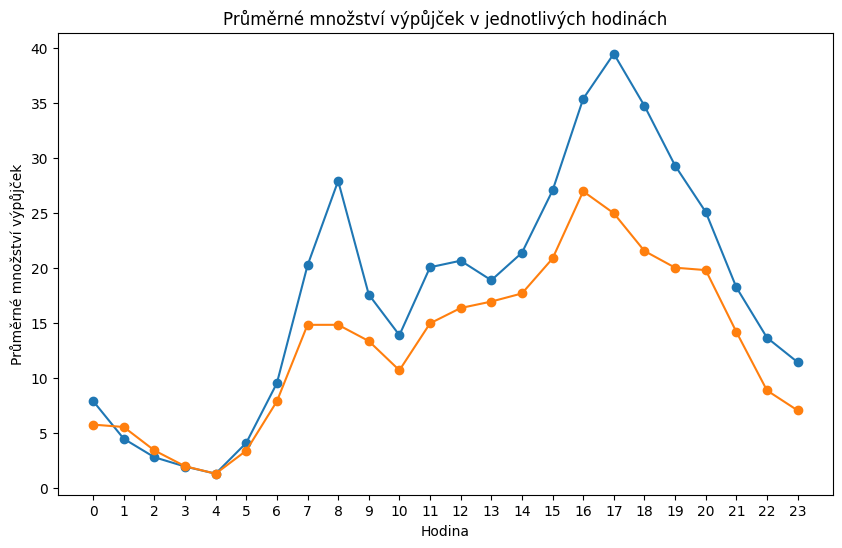

In [101]:

prumer_vypujcek_dry = dry.groupby(dry['time'].dt.hour)['rental_number'].mean()
prumer_vypujcek_rain = rainy.groupby(rainy['time'].dt.hour)['rental_number'].mean()


# Vytvoření grafu
plt.figure(figsize=(10, 6))
plt.plot(prumer_vypujcek_dry.index, prumer_vypujcek_dry.values, marker='o', linestyle='-')
plt.plot(prumer_vypujcek_rain.index, prumer_vypujcek_rain.values, marker='o', linestyle='-')
plt.title('Průměrné množství výpůjček v jednotlivých hodinách')
plt.xlabel('Hodina')
plt.ylabel('Průměrné množství výpůjček')
plt.xticks(range(24))  # nastavení hodin na x-ové ose

plt.show()


Text(0, 0.5, 'průměrný očet výpůjček/h')

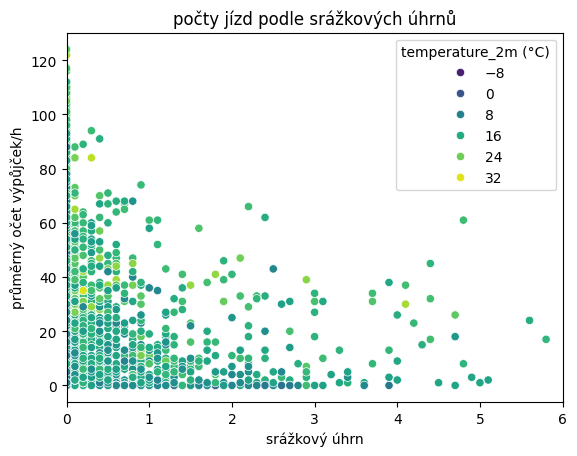

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

korel_data = merged_data[["temperature_2m (°C)",'rental_number', "rain (mm)"]]


sns.scatterplot(data=korel_data, x="rain (mm)", y="rental_number", hue = "temperature_2m (°C)", palette = "viridis")
plt.xlim(0, 6)
plt.title('počty jízd podle srážkových úhrnů')
plt.xlabel('srážkový úhrn')
plt.ylabel('průměrný počet výpůjček/h')


In [12]:
#teplotička

In [54]:
merged_data["temperature"] = merged_data["temperature_2m (°C)"].round().astype(int)
merged_data["temperature"].min()

-12

<Axes: xlabel='temperature_2m (°C)', ylabel='rental_number'>

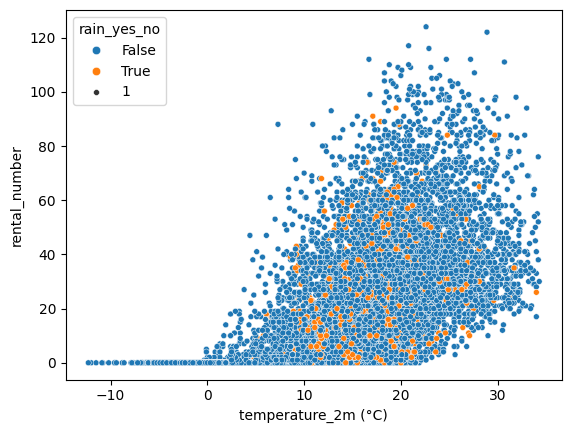

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

korel_data = merged_data[["temperature_2m (°C)",'rental_number', "rain_yes_no"]]


sns.scatterplot(data=korel_data, x="temperature_2m (°C)", y="rental_number", hue = "rain_yes_no", size = 1)



<Axes: xlabel='temperature_2m (°C)', ylabel='rental_number'>

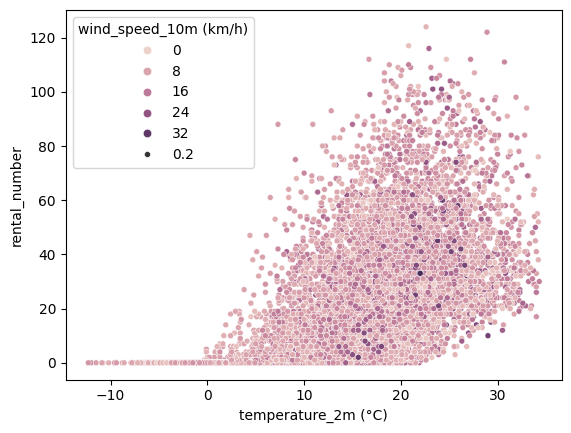

In [56]:

korel_data = merged_data[["temperature_2m (°C)",'rental_number', "wind_speed_10m (km/h)"]]


sns.scatterplot(data=korel_data, x="temperature_2m (°C)", y="rental_number", hue = "wind_speed_10m (km/h)", size = 0.2)

In [57]:
temp_data = merged_data[["temperature", "rental_number"]].groupby("temperature").mean()
temp_data = temp_data.reset_index()
temp_data

,temperature,rental_number
0,-12,0.000000
1,-11,0.000000
2,-10,0.000000
3,-9,0.000000
4,-8,0.000000
5,-7,0.000000
6,-6,0.000000
7,-5,0.000000
8,-4,0.000000
9,-3,0.000000


/var/folders/bw/bypp18t56_j88v6zlzc3jbvh0000gn/T/ipykernel_78145/3739175341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="temperature", y="rental_number", data = temp_data, palette='viridis')


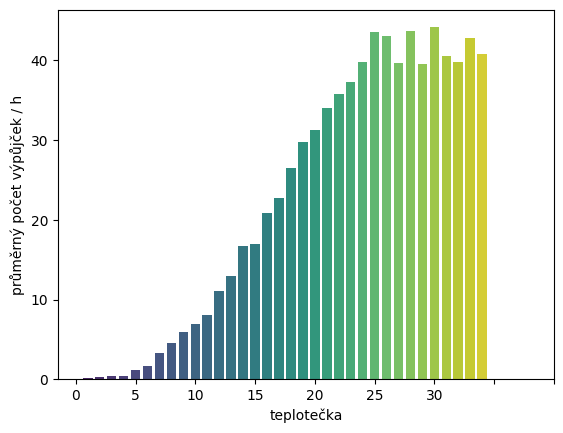

In [58]:
#chce odladit popisky x a popisek osy y (za hodinu)

temp_data = temp_data[temp_data["temperature"]>-2]
sns.barplot(x="temperature", y="rental_number", data = temp_data, palette='viridis')
plt.xticks([1, 6, 11, 16, 21, 26, 31, 36, 41 ])
plt.ylabel('průměrný počet výpůjček / h')
plt.xlabel('teplotečka')
plt.show()

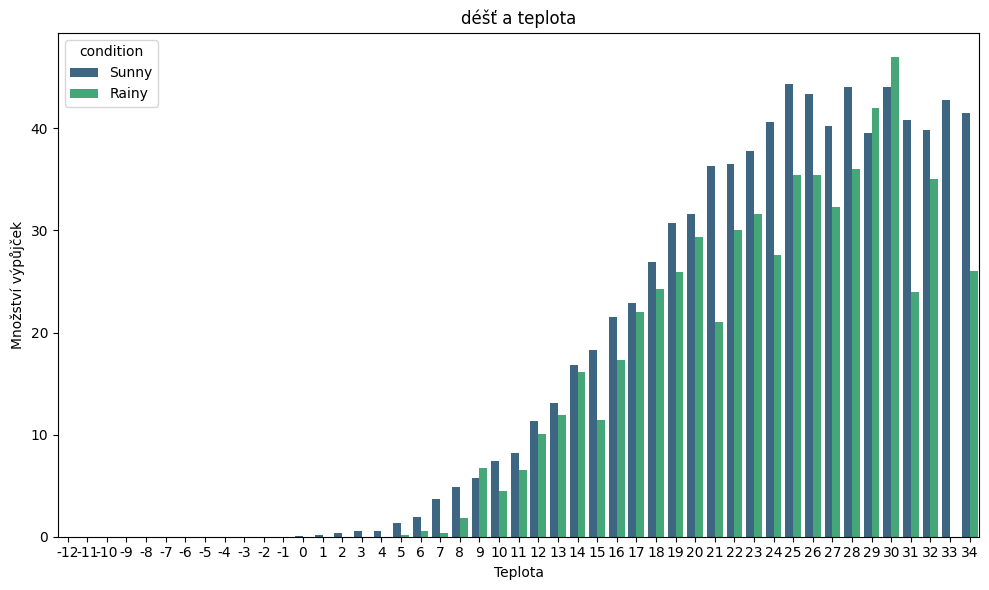

In [102]:
rain_subset  = merged_data[merged_data["rain (mm)"]>0]
dry_subset = merged_data[merged_data["rain (mm)"] == 0]
temp_data_rain = rain_subset[["temperature", "rental_number"]].groupby("temperature").mean()
temp_data_dry= dry_subset[["temperature", "rental_number"]].groupby("temperature").mean()
temp_data_rain = temp_data_rain.reset_index()
temp_data_dry = temp_data_dry.reset_index()

combined_data = pd.concat([temp_data_rain.assign(condition='Rainy'), temp_data_dry.assign(condition='Sunny')])


plt.figure(figsize=(10, 6))
sns.barplot(x="temperature", y="rental_number", hue="condition", data=combined_data, palette="viridis")
plt.title('déšť a teplota')
plt.xlabel('Teplota')
plt.ylabel('Množství výpůjček')

plt.tight_layout()  
plt.show()

/var/folders/bw/bypp18t56_j88v6zlzc3jbvh0000gn/T/ipykernel_78145/1800413022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="temperature", y="rental_number", data = temp_data, palette='viridis')


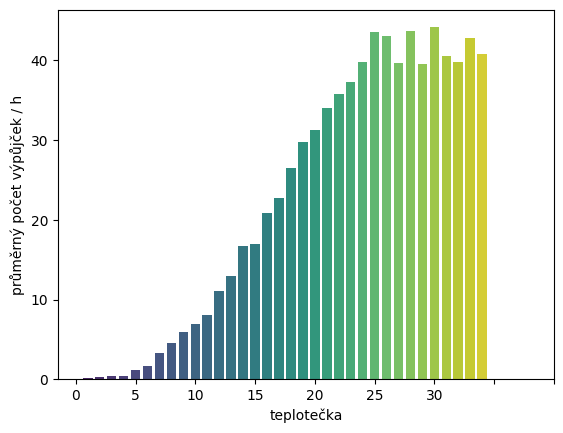

In [60]:
temp_data = temp_data[temp_data["temperature"]>-2]
sns.barplot(x="temperature", y="rental_number", data = temp_data, palette='viridis')
plt.xticks([1, 6, 11, 16, 21, 26, 31, 36, 41 ])
plt.ylabel('průměrný počet výpůjček / h')
plt.xlabel('teplotečka')
plt.show()

In [18]:
merged_data.columns

Index(['rental_number', 'time', 'temperature_2m (°C)', 'rain (mm)',
       'snowfall (cm)', 'wind_speed_10m (km/h)', 'wind_gusts_10m (km/h)',
       'is_day ()', 'rain_yes_no', 'temperature'],
      dtype='object')

In [61]:
merged_data[merged_data['snowfall (cm)']>0]

,rental_number,time,temperature_2m (°C),rain (mm),snowfall (cm),wind_speed_10m (km/h),wind_gusts_10m (km/h),is_day (),rain_yes_no,temperature
441,18,2022-04-19 09:00:00,6.1,0.4,0.07,8.1,19.8,1,True,6
5561,0,2022-11-18 17:00:00,0.3,0.0,0.07,14.2,24.8,0,False,0
5562,0,2022-11-18 18:00:00,-0.3,0.0,0.07,14.6,26.3,0,False,0
5569,0,2022-11-19 01:00:00,-1.2,0.0,0.07,12.2,23.0,0,False,-1
5570,0,2022-11-19 02:00:00,-1.6,0.0,0.07,10.6,21.6,0,False,-2
...,...,...,...,...,...,...,...,...,...,...
8911,0,2023-04-07 07:00:00,3.0,0.1,0.21,12.1,22.0,1,True,3
8917,0,2023-04-07 13:00:00,5.6,0.3,0.07,14.1,28.8,1,True,6
8926,0,2023-04-07 22:00:00,2.4,1.3,0.14,5.9,11.9,0,True,2
8927,0,2023-04-07 23:00:00,1.6,1.0,0.91,4.7,11.2,0,True,2


In [62]:
snow = merged_data[(merged_data['snowfall (cm)']>0)]
no_snow = merged_data[merged_data['snowfall (cm)'] == 0]


snow_mean = snow['rental_number'].mean()
no_snow_mean  = no_snow['rental_number'].mean()


print(f'Průměrný počet výpůjček v sněživých hodinách: {snow_mean}')
print(f'Průměrný počet výpůjček v nesněživých hodinách: {no_snow_mean}')


Průměrný počet výpůjček v sněživých hodinách: 0.12080536912751678
Průměrný počet výpůjček v nesněživých hodinách: 17.3586554124093


In [66]:
snow = merged_data[(merged_data['snowfall (cm)']>0)&(merged_data["temperature_2m (°C)"]<7)]
no_snow = merged_data[(merged_data['snowfall (cm)'] == 0)&(merged_data["temperature_2m (°C)"]<7)]


snow_mean = snow['rental_number'].mean()
no_snow_mean  = no_snow['rental_number'].mean()


print(f'Průměrný počet výpůjček v sněživých hodinách: {snow_mean}')
print(f'Průměrný počet výpůjček v nesněživých hodinách: {no_snow_mean}')

Průměrný počet výpůjček v sněživých hodinách: 0.12080536912751678
Průměrný počet výpůjček v nesněživých hodinách: 0.5809325809325809


In [67]:
merged_data[(merged_data["rental_number"]>0)&((merged_data["snowfall (cm)"]>0))]

,rental_number,time,temperature_2m (°C),rain (mm),snowfall (cm),wind_speed_10m (km/h),wind_gusts_10m (km/h),is_day (),rain_yes_no,temperature
441,18,2022-04-19 09:00:00,6.1,0.4,0.07,8.1,19.8,1,True,6


In [26]:
merged_data["temperature_2m (°C)"].min()
len(merged_data)

13896